## Multiclass Classification Model

In [92]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_3_2.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

x (300, 2)
y (300,)


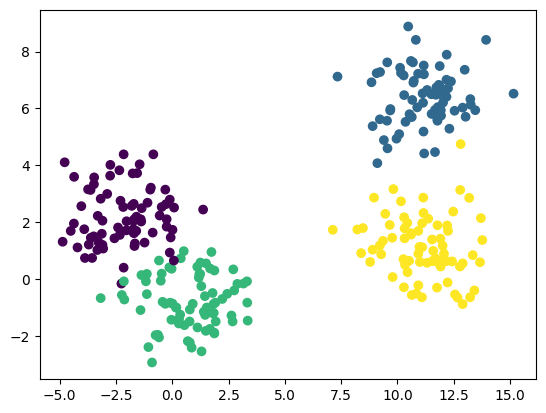

In [93]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

### Create a model

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
  def __init__(self, numb_input):
    super().__init__()
    self.linear = nn.Linear(numb_input, 1)
    self.losses = []

  def forward(self, x):
    '''
    x : tensor(m, 2)
    y : tensor(m)
    '''
    out = self.linear(x) # tensor(m, 1)
    out = torch.sigmoid(out) # tensor(m, 1)
    return out.flatten() # tensor(m)

  def fit(self, x, y, numb_iter=2000, lr=0.01):
    opt = optim.SGD(self.parameters(), lr=lr)
    for i in range(numb_iter):
      zip = self(x)
      J = -y*torch.log(zip) - (1 - y)*torch.log(1-zip)
      J = J.mean()

      if i % 20 == 0:
        print('iter: %d, J: %f' % (i, J.item()))

      J.backward()
      opt.step() # update gradient
      opt.zero_grad()  # reset gradient
      self.losses.append(J.item())

  def evaluate(self, x, y):
    zip = self(x)
    zip = (zip > 0.5).float()
    return (zip == y).float().mean()


In [95]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

### Data Preparation
90% for training (seen data), 10% for testing (unseen data).

length of x:  300
train_data_index:  270


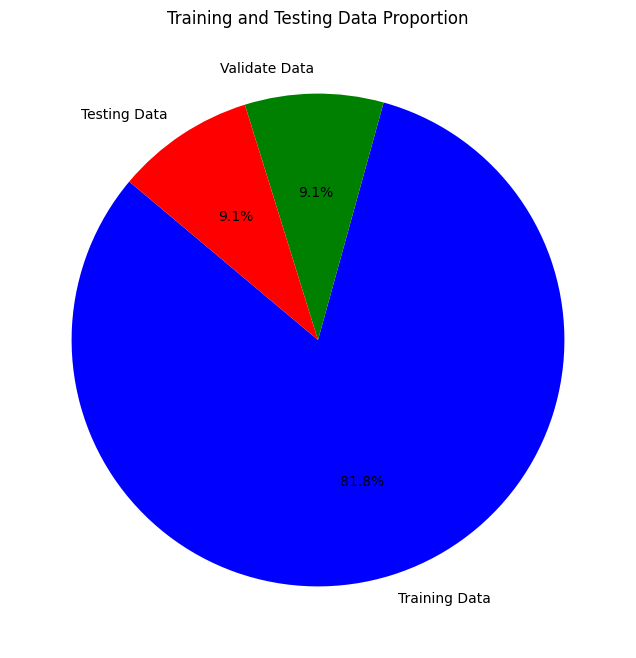

In [96]:
import torch

print('length of x: ', len(x))
train_data_index = int(len(x) * 0.9) # 90% of the data is used for training
# train_data_index = len(x) # 100% of the data is used for training
print('train_data_index: ', train_data_index)
tx = x[:train_data_index]
ty = y[:train_data_index]

train_x = torch.tensor(tx.copy(), dtype=torch.float32)
train_scaled_x = torch.tensor(feature_scaling(tx.copy().reshape(-1, 2)), dtype=torch.float32)
train_y = torch.tensor(ty.copy(), dtype=torch.float32)

validate_data_index = int(len(x) * 0.8) 
vx = x[validate_data_index:train_data_index] # 10% of the data is used for validation
vy = y[validate_data_index:train_data_index]

validate_x = torch.tensor(vx.copy(), dtype=torch.float32)
validate_y = torch.tensor(vy.copy(), dtype=torch.float32)

tt_x = x[train_data_index:]
tt_y = y[train_data_index:]

test_x = torch.tensor(tt_x.copy(), dtype=torch.float32)
test_y = torch.tensor(tt_y.copy(), dtype=torch.float32)

# Plotting the data
dd = [len(tx), len(vx), len(tt_x)]
labels = ['Training Data', 'Validate Data', 'Testing Data']
colors = ['blue', 'green', 'red']
# Plotting the pie chart
def plot_pie_chart(data, labels, colors):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Training and Testing Data Proportion')
    plt.show()

plot_pie_chart(dd, labels, colors)

### Training Model Without Feature Scaling

In [97]:
models = [MyModel(2), MyModel(2), MyModel(2), MyModel(2)]

for i, model in enumerate(models):
  new_y = ty.copy()
  id = new_y == i
  id_not = new_y != i
  new_y[id] = 1
  new_y[id_not] = 0
  local_y = torch.tensor(new_y, dtype=torch.float32)
  model.fit(train_x, local_y)

iter: 0, J: 2.853138
iter: 20, J: 0.293028
iter: 40, J: 0.232287
iter: 60, J: 0.208133
iter: 80, J: 0.192896
iter: 100, J: 0.181811
iter: 120, J: 0.173176
iter: 140, J: 0.166168
iter: 160, J: 0.160319
iter: 180, J: 0.155336
iter: 200, J: 0.151021
iter: 220, J: 0.147237
iter: 240, J: 0.143881
iter: 260, J: 0.140878
iter: 280, J: 0.138170
iter: 300, J: 0.135710
iter: 320, J: 0.133463
iter: 340, J: 0.131399
iter: 360, J: 0.129493
iter: 380, J: 0.127726
iter: 400, J: 0.126082
iter: 420, J: 0.124547
iter: 440, J: 0.123107
iter: 460, J: 0.121755
iter: 480, J: 0.120479
iter: 500, J: 0.119275
iter: 520, J: 0.118133
iter: 540, J: 0.117050
iter: 560, J: 0.116019
iter: 580, J: 0.115037
iter: 600, J: 0.114099
iter: 620, J: 0.113202
iter: 640, J: 0.112342
iter: 660, J: 0.111518
iter: 680, J: 0.110726
iter: 700, J: 0.109964
iter: 720, J: 0.109230
iter: 740, J: 0.108522
iter: 760, J: 0.107838
iter: 780, J: 0.107177
iter: 800, J: 0.106538
iter: 820, J: 0.105919
iter: 840, J: 0.105319
iter: 860, J: 0.1

### Plot the losses

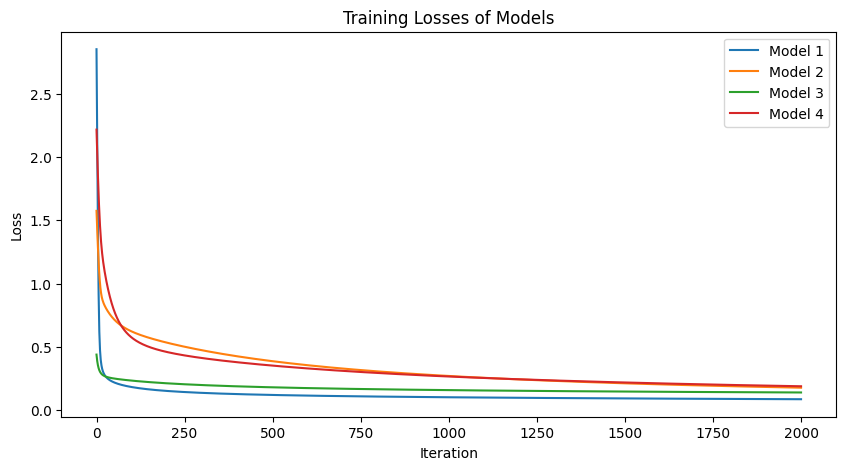

In [98]:
# Plotting the losses
def plot_losses(models):
    plt.figure(figsize=(10, 5))
    for i, model in enumerate(models):
        plt.plot(model.losses, label=f'Model {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Losses of Models')
    plt.legend()
    plt.show()

plot_losses(models)

### Evaluating the Models Without Feature Scaling

In [99]:
for i, model in enumerate(models):
  accuracy = model.evaluate(train_x, local_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy.item()))

Model 1, accuracy rate: 0.4778
Model 2, accuracy rate: 0.5037
Model 3, accuracy rate: 0.5444
Model 4, accuracy rate: 0.9481


### Train the Models with Feature Scaling

In [100]:
scaled_models = [MyModel(2), MyModel(2), MyModel(2), MyModel(2)]

for i, model in enumerate(scaled_models):
  new_y = ty.copy()
  id = new_y == i
  id_not = new_y != i
  new_y[id] = 1
  new_y[id_not] = 0
  local_y = torch.tensor(new_y, dtype=torch.float32)
  model.fit(train_scaled_x, local_y, numb_iter=5000)

iter: 0, J: 0.589463
iter: 20, J: 0.580404
iter: 40, J: 0.572077
iter: 60, J: 0.564409
iter: 80, J: 0.557338
iter: 100, J: 0.550805
iter: 120, J: 0.544759
iter: 140, J: 0.539154
iter: 160, J: 0.533947
iter: 180, J: 0.529101
iter: 200, J: 0.524582
iter: 220, J: 0.520360
iter: 240, J: 0.516406
iter: 260, J: 0.512698
iter: 280, J: 0.509211
iter: 300, J: 0.505927
iter: 320, J: 0.502828
iter: 340, J: 0.499896
iter: 360, J: 0.497118
iter: 380, J: 0.494480
iter: 400, J: 0.491971
iter: 420, J: 0.489578
iter: 440, J: 0.487294
iter: 460, J: 0.485108
iter: 480, J: 0.483012
iter: 500, J: 0.481000
iter: 520, J: 0.479065
iter: 540, J: 0.477201
iter: 560, J: 0.475401
iter: 580, J: 0.473662
iter: 600, J: 0.471979
iter: 620, J: 0.470348
iter: 640, J: 0.468764
iter: 660, J: 0.467225
iter: 680, J: 0.465726
iter: 700, J: 0.464267
iter: 720, J: 0.462843
iter: 740, J: 0.461453
iter: 760, J: 0.460094
iter: 780, J: 0.458764
iter: 800, J: 0.457462
iter: 820, J: 0.456185
iter: 840, J: 0.454933
iter: 860, J: 0.4

### Plot the losses

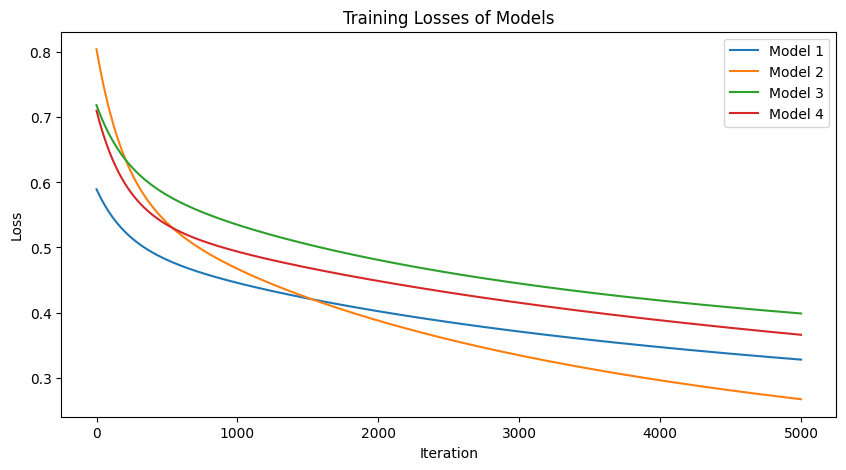

In [101]:
plot_losses(scaled_models)

### Evaluate the Scaled Models

In [102]:
for i, model in enumerate(scaled_models):
  accuracy = model.evaluate(train_scaled_x, local_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy.item()))

Model 1, accuracy rate: 0.6296
Model 2, accuracy rate: 0.5407
Model 3, accuracy rate: 0.7444
Model 4, accuracy rate: 0.7926


### Combine the Results

In [105]:
def eval(mm, x, y):
    for model in mm:
        model.eval()
    
    result_m0 = mm[0](x)
    result_m1 = mm[1](x)
    result_m2 = mm[2](x)
    result_m3 = mm[3](x)
    # print(result_m0)
    # print(result_m1)
    # print(result_m2)
    # print(result_m3)
    result = torch.cat((result_m0.view(-1, 1), result_m1.view(-1, 1), result_m2.view(-1, 1), result_m3.view(-1, 1)), dim=1).argmax(dim=1)
    accuracy = (result == y.view(-1)).float().mean().item()
    loss = (result != y.view(-1)).float().mean().item()
    print('Accuracy: ', accuracy)
    print('Loss: ', loss)


In [106]:
print("Evaluate model without scaling")
eval(models, validate_x, validate_y)

print("Evaluate model with scaling")
eval(scaled_models, validate_x, validate_y)

Evaluate model without scaling
Accuracy:  0.9666666388511658
Loss:  0.03333333507180214
Evaluate model with scaling
Accuracy:  0.46666666865348816
Loss:  0.5333333611488342
